<a href="https://colab.research.google.com/github/shalumishra98/HOTEL-BOOKING-ANALYSIS/blob/main/HOTEL_BOOKING_EDA_ANALYSIS_GP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#**HOTEL_BOOKING_ANALYSIS**- 



##### **Project Type**    - EDA/HOTEL_BOOKING_ANAYSIS
##### **Contribution**    -Team
##### **Team Member 1 -Subhrakanta Panda**
##### **Team Member 2 -Salini Mishra**
##### **Team Member 3 -Jyotiprakash Swain**

# **Project Summary -**

***This data set contains booking information for city hotels and resort hotels. It also includes information such as when the booking was made, the length of stay, the number of adults, children, or babies, and the number of available parking spaces, etc. All personally identifying information has formed this data.***

# **GitHub Link -**

https://github.com/shalumishra98

In [1]:
# Importing all import python libraries
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import folium
import plotly.express as px
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
path = "/content/drive/MyDrive/Colab Notebooks/Hotel_Bookings.csv"

In [3]:
# Mounting drive
from google.colab import drive                    
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Hotel_Bookings.csv")

In [5]:
hotel_df.head() 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [6]:
hotel_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel_df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


We see that there are 32 columns in the dataframe and some columns like 'children', 'company', 'country' and 'agent' have null values.

In [8]:
# Creating a copy of dataframe
df1 = hotel_df.copy()

First of all we will try to understand the meaning of all columns of the dataframe.

For this we will see the unique values attained by each column whose meaning we are unable to understand.

In [9]:
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [10]:
df1['is_canceled'].unique()

array([0, 1])

In [11]:
df1['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [12]:
df1['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [13]:
df1['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [14]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [15]:
df1['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

### ***Cleaning data***
Cleaning data is crucial step before EDA as it will remove the ambigous data that can affect the outcome of EDA.

#####While cleaning data we will perform following steps: 

#####1.Remove duplicate rows.
#####2.Handling missing values. 
#####3.Convert columns to appropriate datatypes. 
#####4.Adding impoertant columns.

#***Step 1: Removing duplicate rows if any***

In [16]:
df1[df1.duplicated()].shape

(31994, 32)

In [17]:
df1.drop_duplicates(inplace = True)

In [18]:
df1.shape

(87396, 32)

#***Step2: Handling missing values.***

In [19]:
df1.isnull().sum().sort_values(ascending = False)[:6]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
assigned_room_type        0
dtype: int64

In [20]:
df1[['company','agent']] = df1[['company','agent']].fillna(0)

In [21]:
df1['children'].fillna(df1['children'].mean(), inplace = True)

In [22]:
df1['country'].fillna('others', inplace = True)

In [23]:
df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [24]:
df1[df1['adults']+df1['babies']+df1['children'] == 0].shape

(166, 32)

In [25]:
df1.drop(df1[df1['adults']+df1['babies']+df1['children'] == 0].index, inplace = True)

#***Step 3: Converting columns to appropriate datatypes.***

In [26]:
df1[['children', 'company', 'agent']] = df1[['children', 'company', 'agent']].astype('int64')

In [27]:
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

#***Step 4: Adding important columns.***

In [28]:
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']

In [29]:
df1['total_people'] = df1['adults']+df1['children']+df1['babies']

In [30]:
df1['non_stay']=df1['total_people']-df1['total_stay']

In [31]:
df1['total_cancled']=df1['non_stay']+df1['is_canceled']+df1['previous_cancellations']

In [32]:
num_df1 = df1[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]

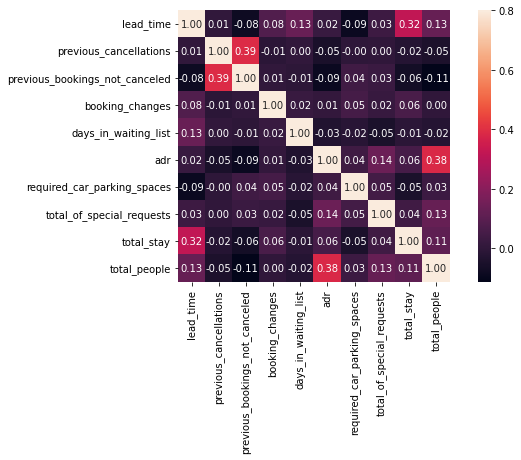

In [33]:
corrmat = num_df1.corr()
f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=.8, square=True);

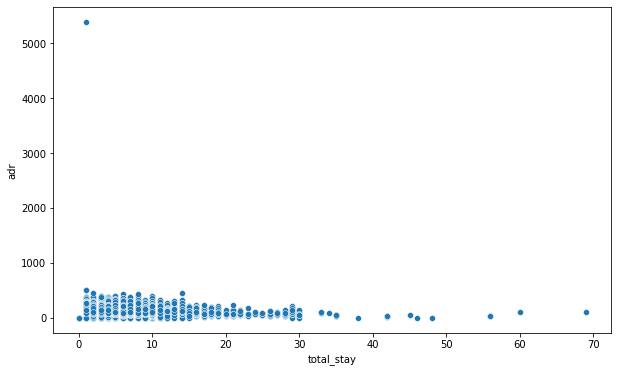

In [34]:
plt.figure(figsize = (10,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.show()

In [35]:
df1.drop(df1[df1['adr'] > 5000].index, inplace = True)

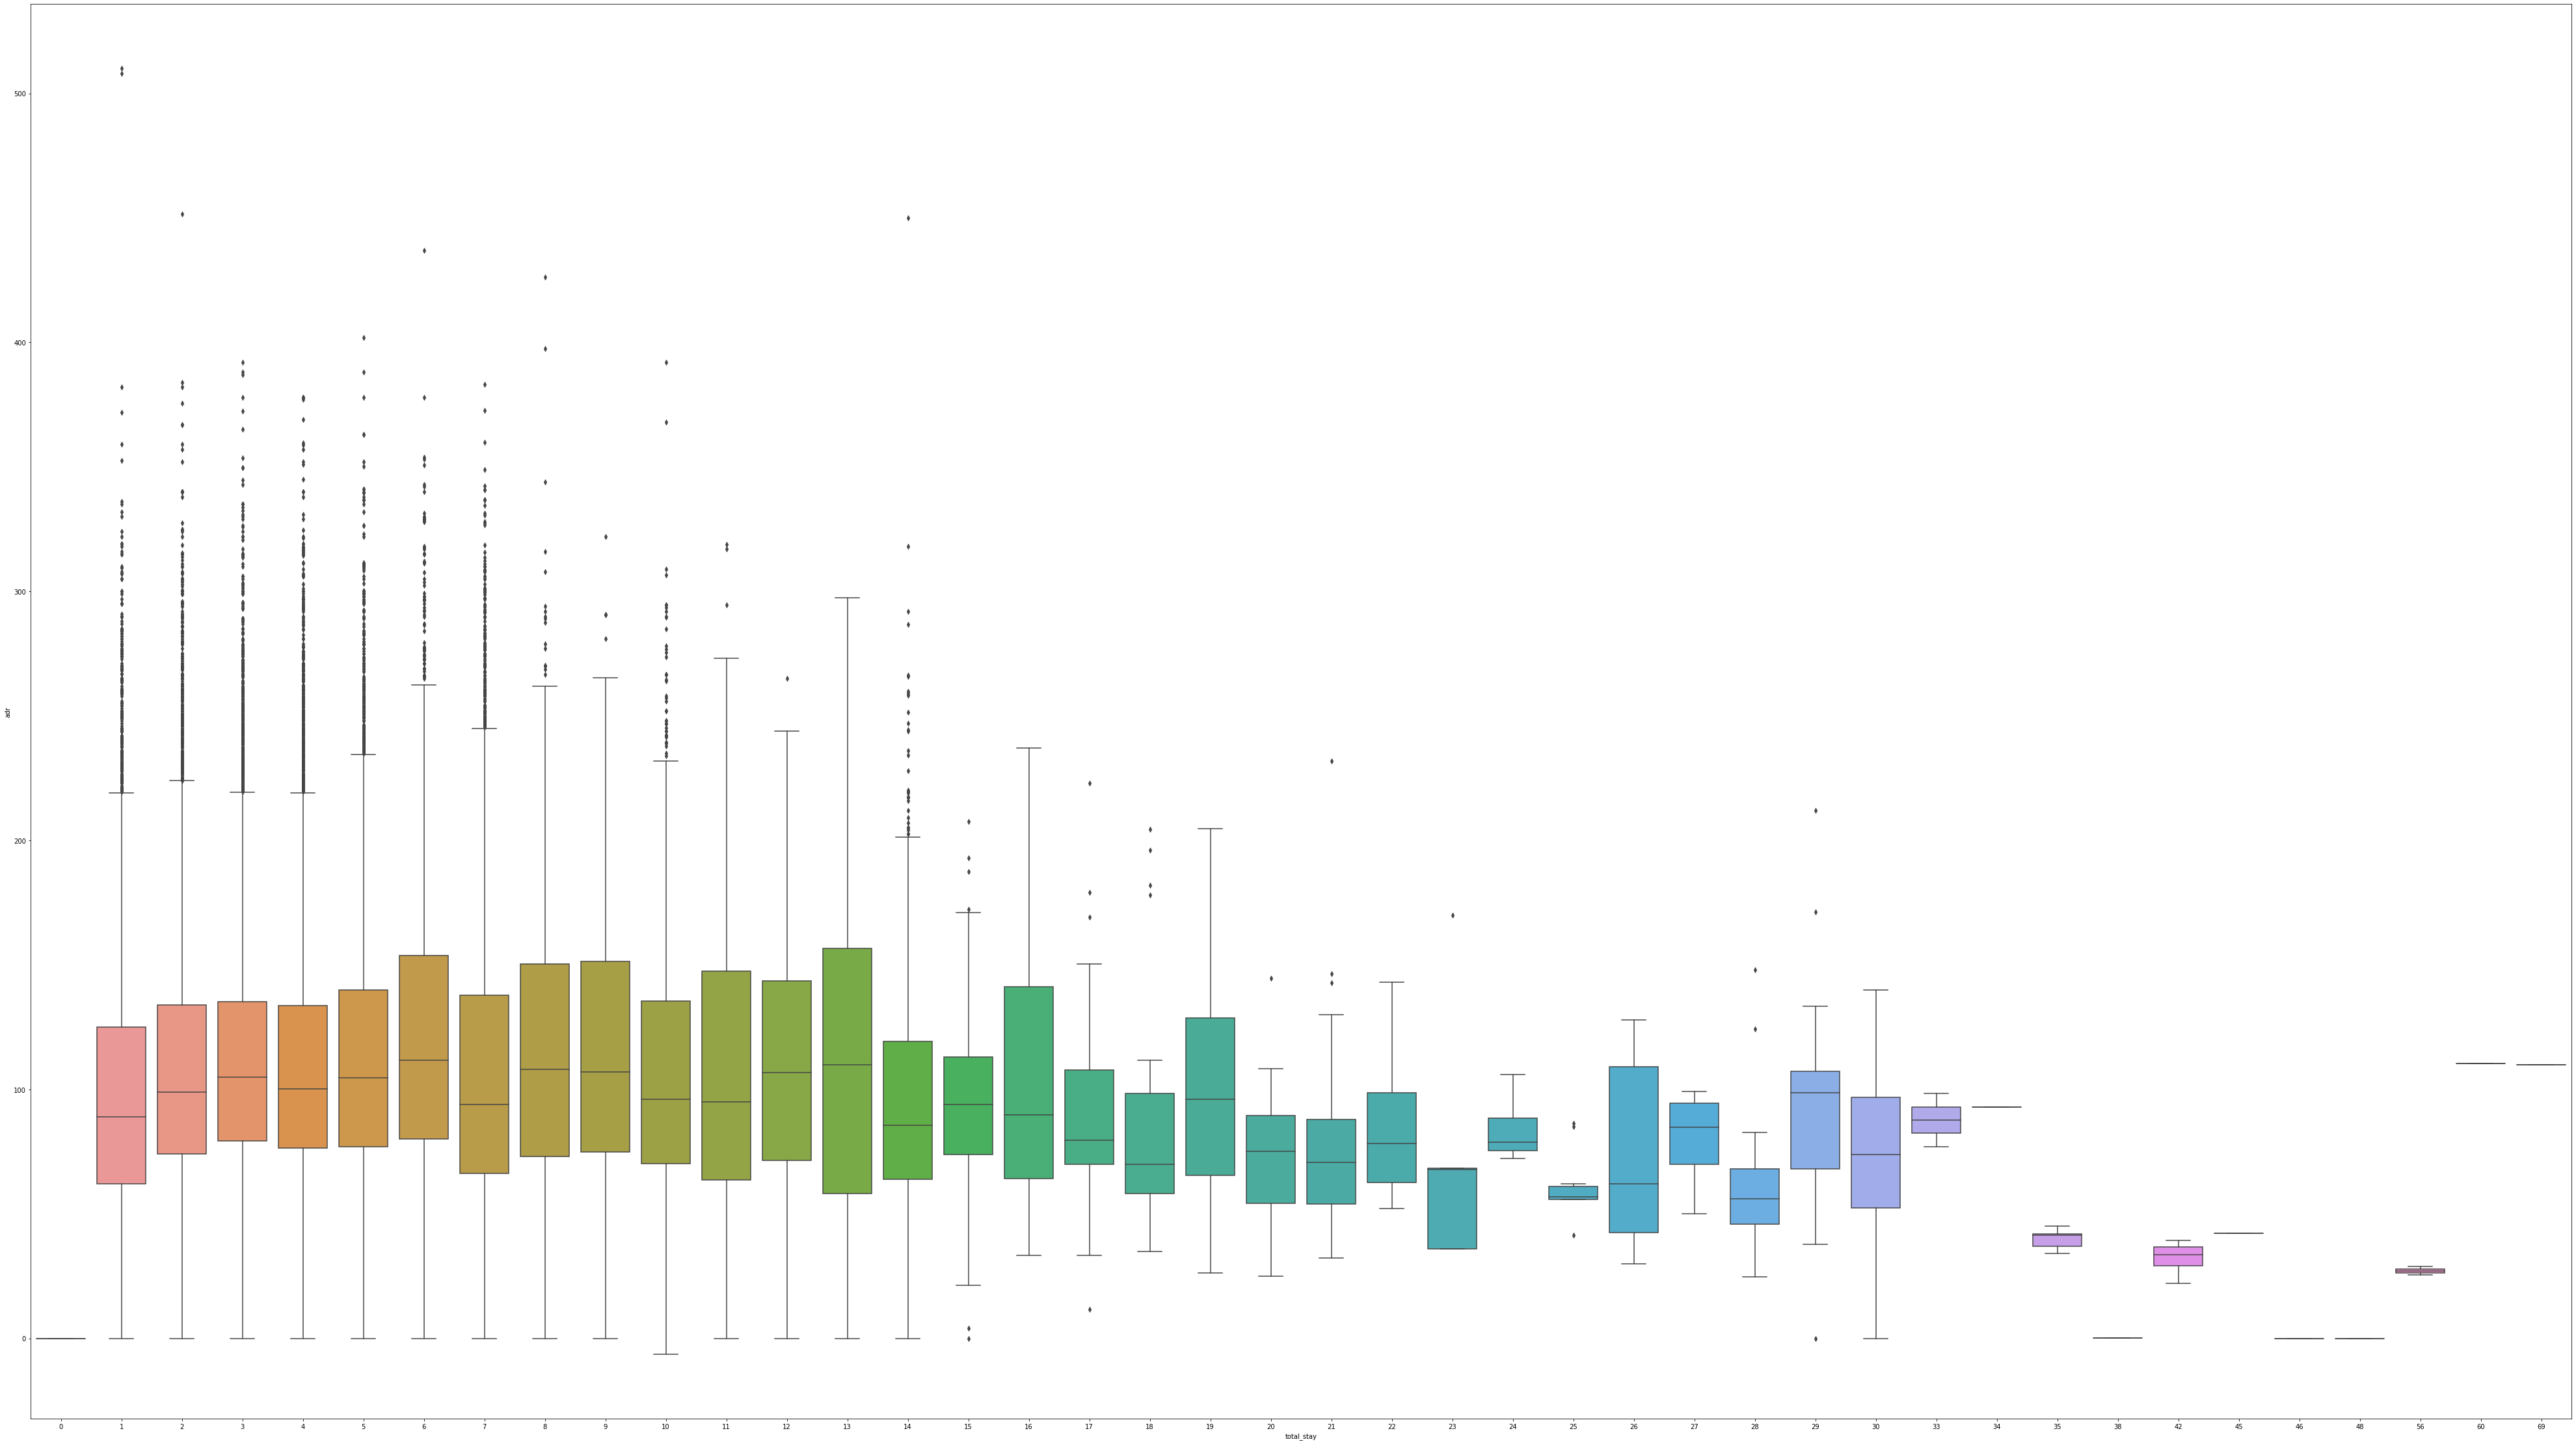

In [36]:
plt.figure(figsize = (70,40))
sns.boxplot(x="total_stay",y="adr", data=df1)

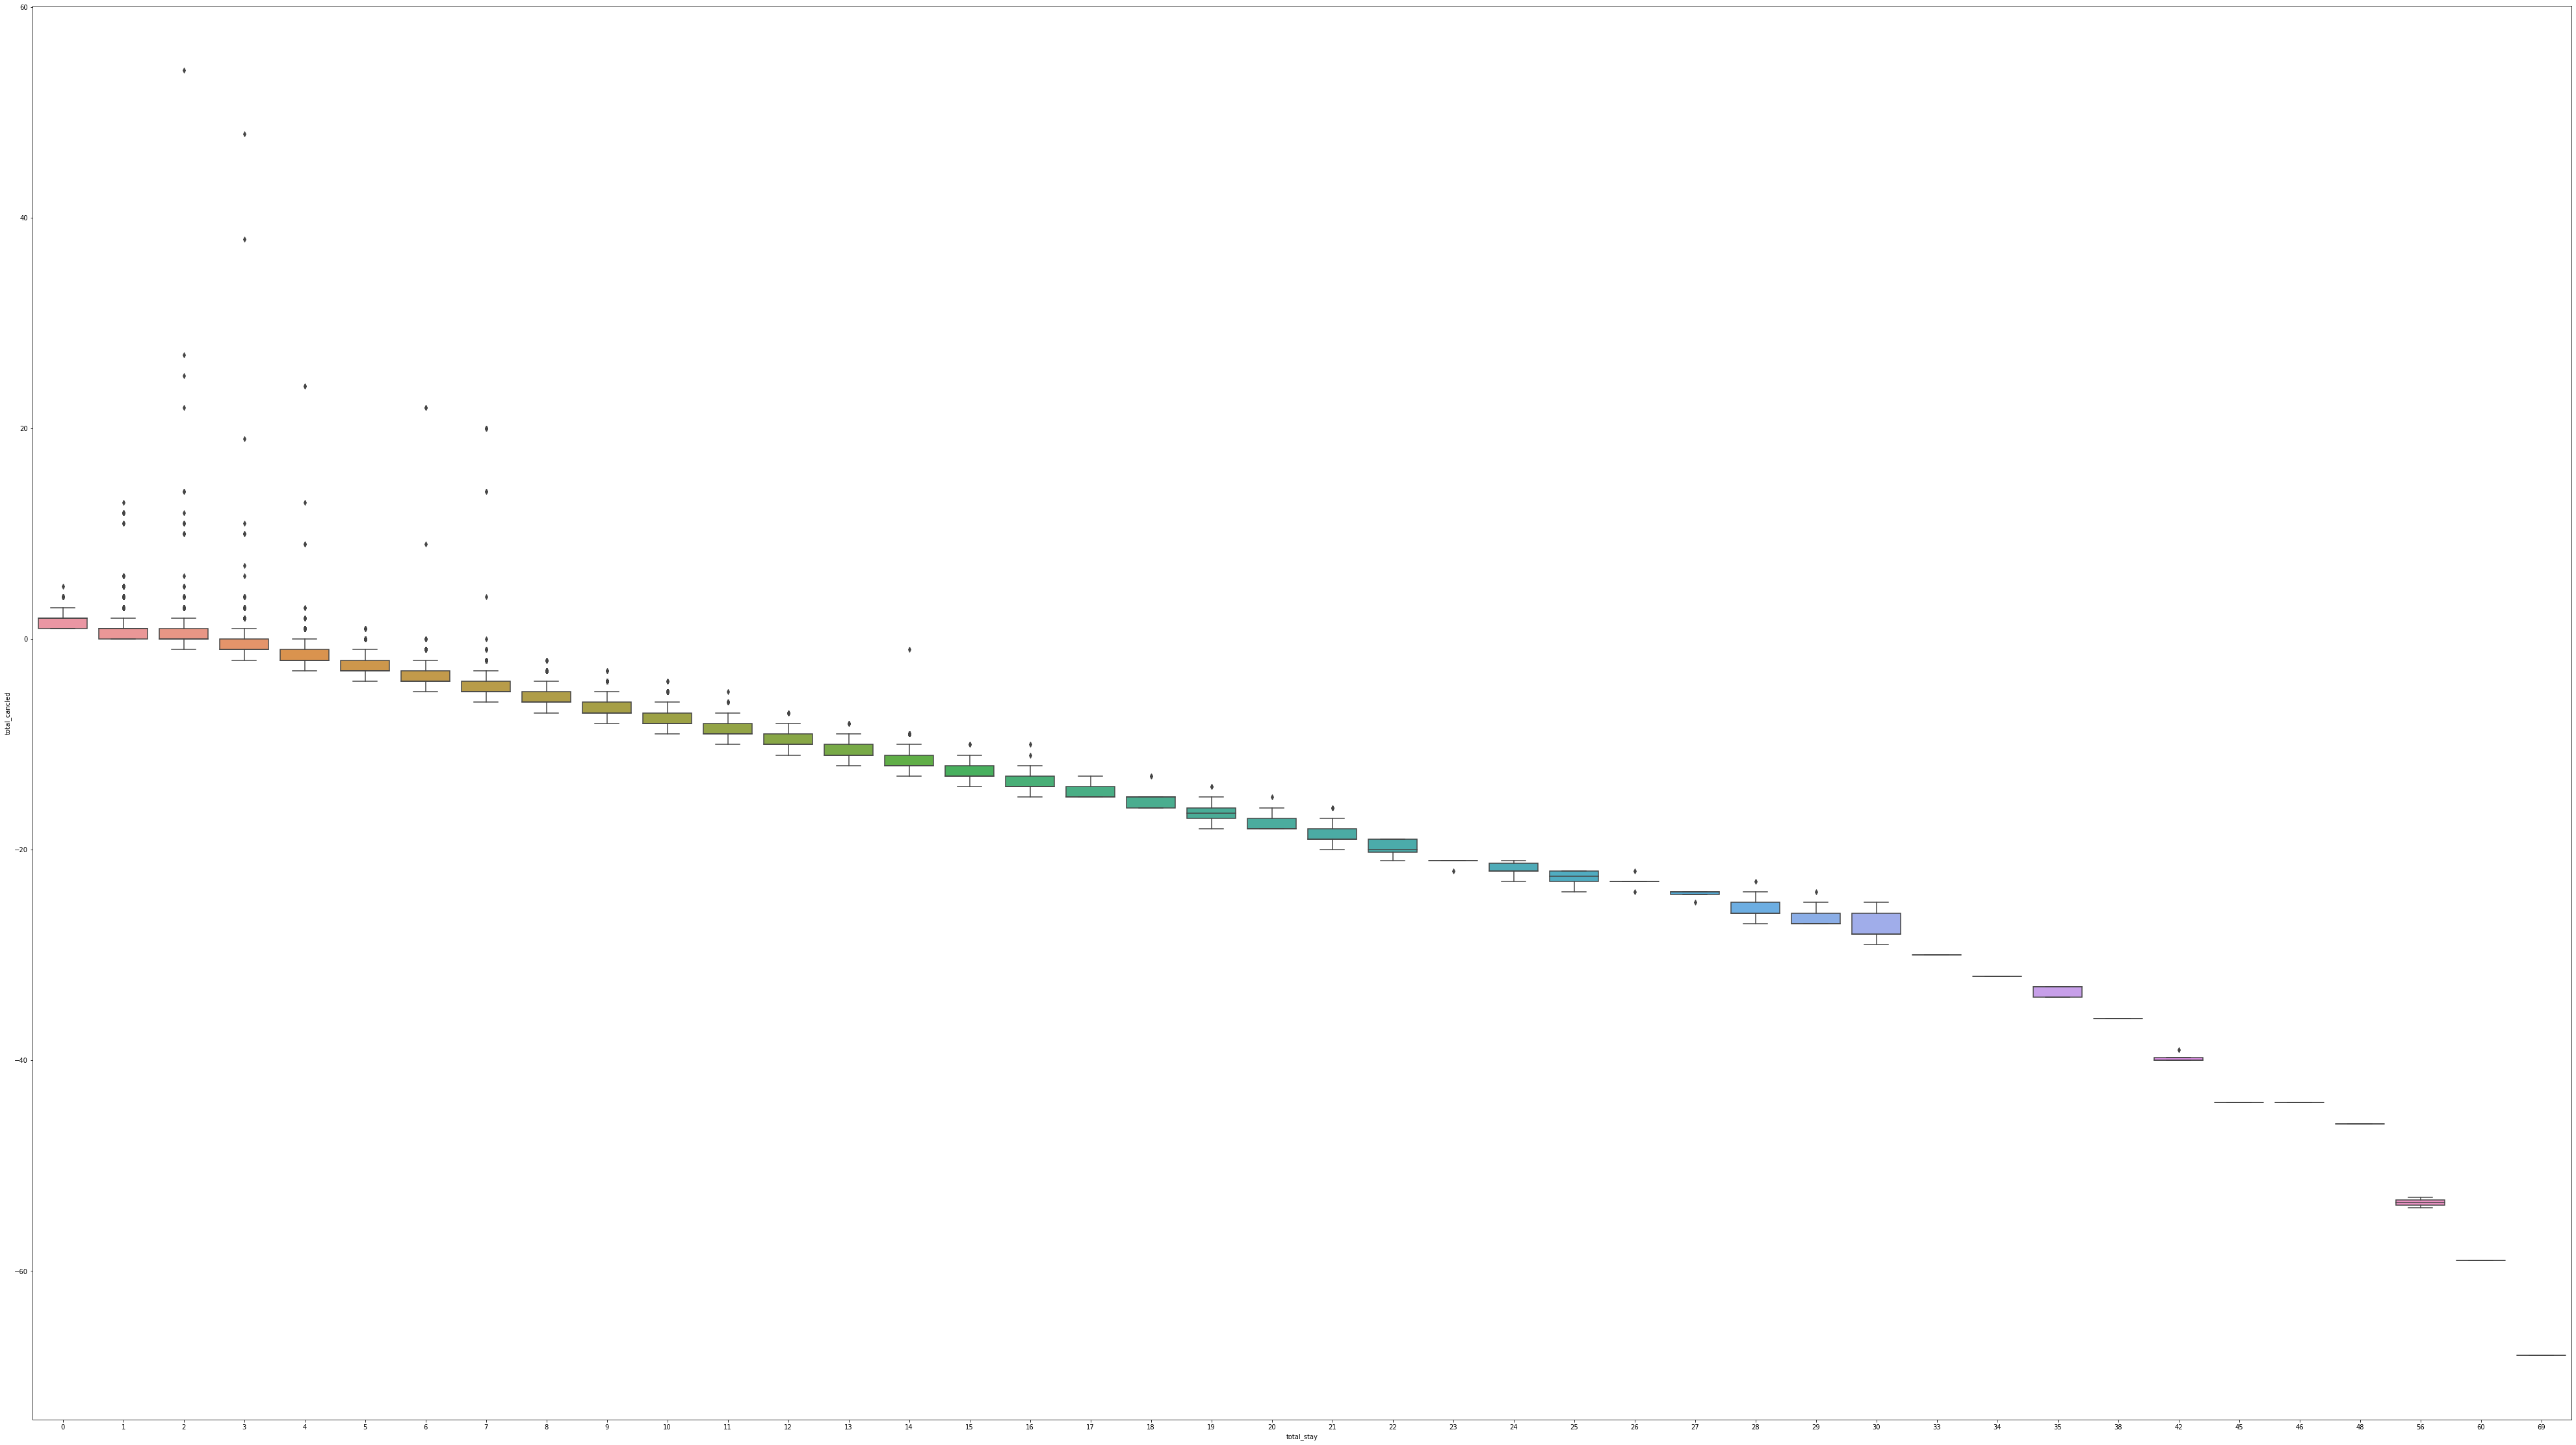

In [37]:
#Boxplot of total_stay and total non_stay
plt.figure(figsize = (70,40))
sns.boxplot(x='total_stay',y='total_cancled', data=df1)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


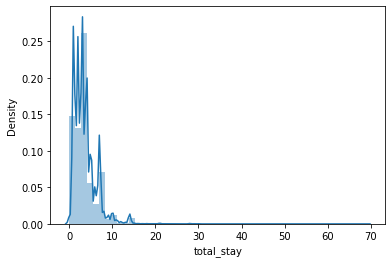

In [38]:
sns.distplot(df1['total_stay'])

## **Some straight forward Questions**

Q1) What is percentage of bookings in each hotel?

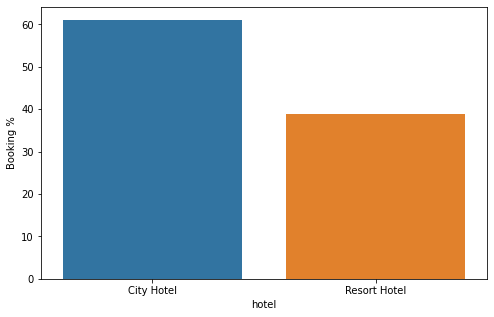

In [39]:
#Calculating percentage
grouped_by_hotel = df1.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df1.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

Around 60% bookings are for City hotel and 40% bookings are for Resort hotel.



Q2) which hotel seems to make more revenue?

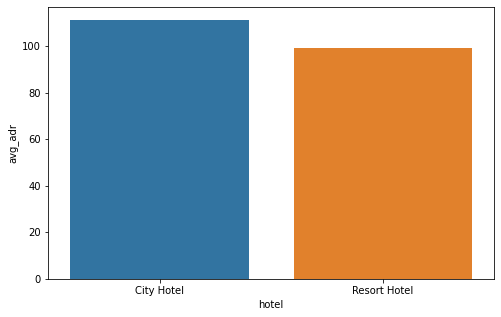

In [40]:
d3 = grouped_by_hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})
plt.figure(figsize = (8,5))
sns.barplot(x = d3['hotel'], y = d3['avg_adr'] )
plt.show()

Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

**Q3**) Which hotel has longer waiting time?

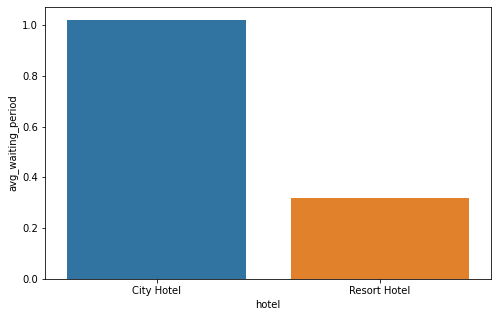

In [41]:
d5 = pd.DataFrame(grouped_by_hotel['days_in_waiting_list'].agg(np.mean).reset_index().rename(columns = {'days_in_waiting_list':'avg_waiting_period'}))
plt.figure(figsize = (8,5))
sns.barplot(x = d5['hotel'], y = d5['avg_waiting_period'] )
plt.show()

City hotel has significantly longer waiting time, hence City Hotel is much busier than Resort Hotel.

In [42]:
def get_count(series, limit=None):
    
    '''
    INPUT:
        series: Pandas Series (Single Column from DataFrame)
        limit:  If value given, limit the output value to first limit samples.
    OUTPUT:
        x = Unique values
        y = Count of unique values
    '''
    
    if limit != None:
        series = series.value_counts()[:limit]
    else:
        series = series.value_counts()
    
    x = series.index
    y = series/series.sum()*100
    
    return x.values,y.values

In [43]:
x,y = get_count(df1['is_canceled'])

In [44]:
x,y

(array([0, 1]), array([72.47704319, 27.52295681]))

In [45]:
def plot(x, y, x_label=None,y_label=None, title=None, figsize=(7,5), type='bar'):
    
    '''
    INPUT:
        x:        Array containing values for x-axis
        y:        Array containing values for y-axis
        x_lable:  String value for x-axis label
        y_lable:  String value for y-axis label
        title:    String value for plot title
        figsize:  tuple value, for figure size
        type:     type of plot (default is bar plot)
        
    OUTPUT:
        Display the plot
    '''
    
    sns.set_style('darkgrid')
    
    fig, ax = plt.subplots(figsize=figsize)
    
    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    
    if x_label != None:
        ax.set_xlabel(x_label)
    
    if y_label != None:
        ax.set_ylabel(y_label)
        
    if title != None:
        ax.set_title(title)
    
    if type == 'bar':
        sns.barplot(x,y, ax = ax)
    elif type == 'line':
        sns.lineplot(x,y, ax = ax, sort=False)
        
    
    plt.show()


**Q3**) How many bookings were cancelled?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


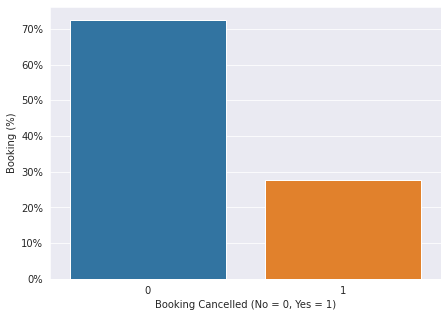

In [46]:
plot(x,y, x_label='Booking Cancelled (No = 0, Yes = 1)', y_label='Booking (%)')

Bookings got canceled 37% of the time. While booking guest did checkd-in (did not cancel the booking ) almost 63% of the time.

**Q4**)Is cancelled have to unique values:1 if booking got cancelled, elese 0 ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


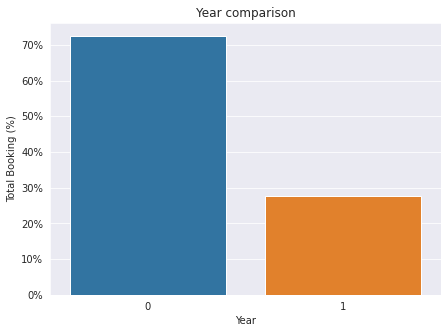

In [47]:
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

In [48]:
df1_not_canceled = df1[df1['is_canceled'] == 0]

**Q5**)How long people stay in hotel?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


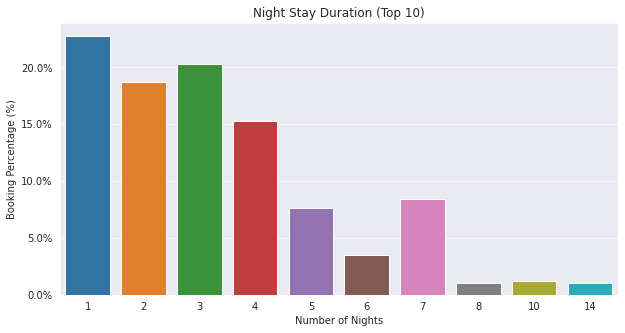

In [49]:
total_nights = df1_not_canceled['stays_in_weekend_nights']+ df1_not_canceled['stays_in_week_nights']
x,y = get_count(total_nights, limit=10)

plot(x,y, x_label='Number of Nights', y_label='Booking Percentage (%)', title='Night Stay Duration (Top 10)', figsize=(10,5))


Most people stay for one, two, or three. More than 60% of guests come under these three options.

**Q6**)What is the booking ratio between Resort hotel and city hotel?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


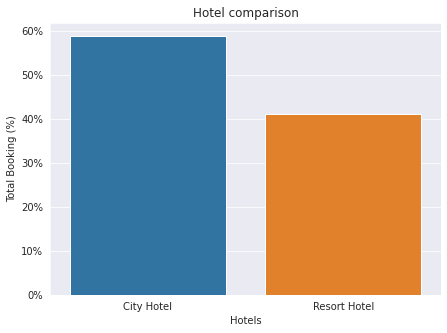

In [50]:
x,y = get_count(df1_not_canceled['hotel'])
plot(x,y, x_label='Hotels', y_label='Total Booking (%)', title='Hotel comparison')

More than 60% of the population booked the City hotel

***Q7***)What is the percentage of booking for each year?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


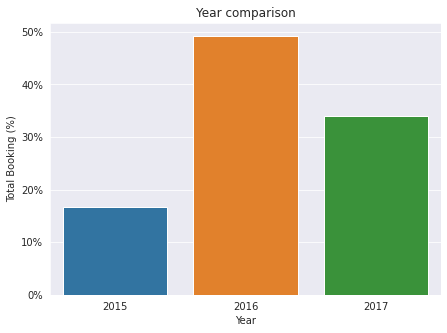

In [51]:
x,y = get_count(df1_not_canceled['arrival_date_year'])
plot(x,y, x_label='Year', y_label='Total Booking (%)', title='Year comparison')

More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% the next year.

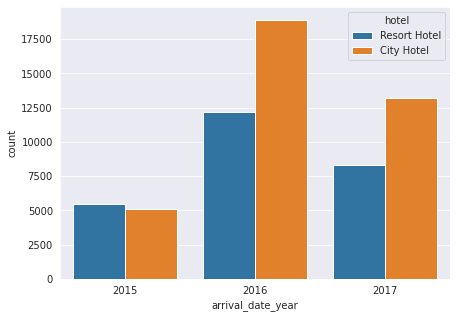

In [52]:
plt.subplots(figsize=(7,5))
sns.countplot(x='arrival_date_year', hue='hotel',  data=df1_not_canceled);

Year-wise and Hotel-wise (side-by-side) comparison

***Q8***) which is the busiest month for hotels?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


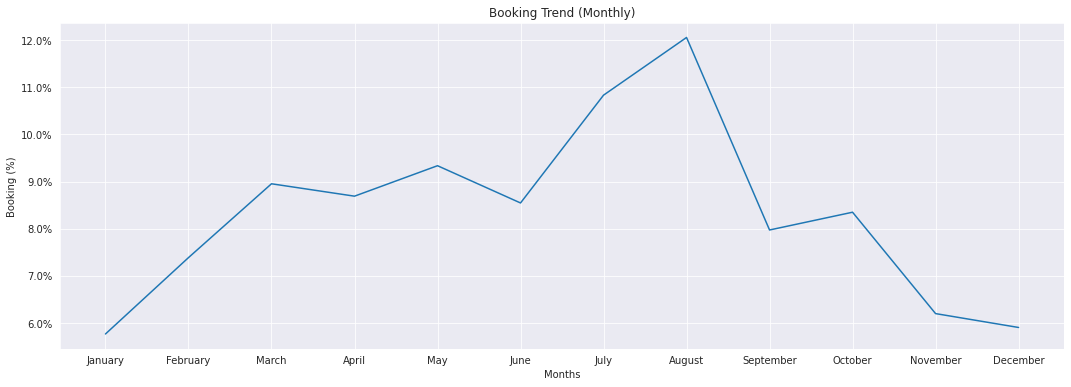

In [53]:
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
             'October', 'November', 'December']

sorted_months = df1_not_canceled['arrival_date_month'].value_counts().reindex(new_order)

x = sorted_months.index
y = sorted_months/sorted_months.sum()*100


#sns.lineplot(x, y.values)
plot(x, y.values, x_label='Months', y_label='Booking (%)', title='Booking Trend (Monthly)', type='line', figsize=(18,6))


As we can see most bookings were made from July to August. And the least bookings were made at the start and end of the year.

***Q9)***From which country most guests come ?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


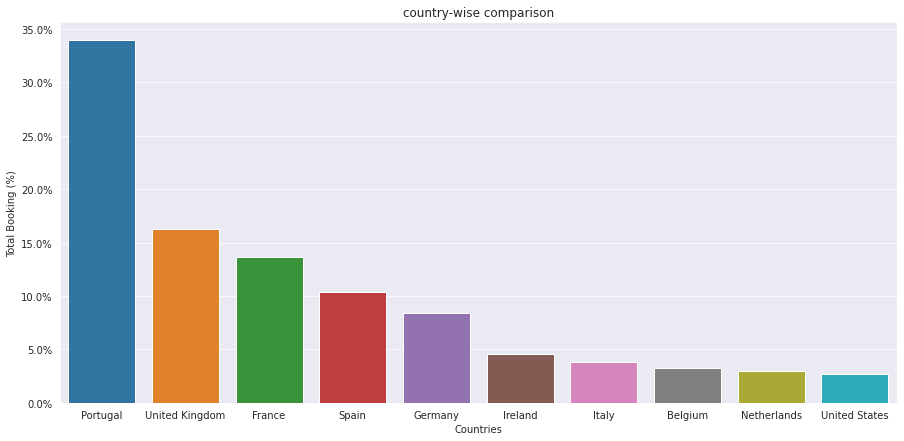

In [56]:
#!pip install pycountry
import pycountry as pc
x,y = get_count(df1_not_canceled['country'], limit=10)

## For each country code select the country name 
country_name = [pc.countries.get(alpha_3=name).name for name in x]

plot(country_name,y, x_label='Countries', y_label='Total Booking (%)', title='country-wise comparison', figsize=(15,7))


Portugal, UK and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.

***Q10)***Which was the most booked accommodation type (Single, Couple, Family)?

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


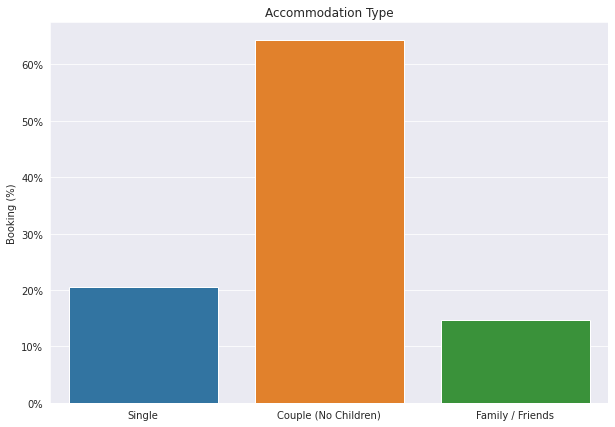

In [57]:
## Select single, couple, multiple adults and family
single   = df1_not_canceled[(df1_not_canceled.adults==1) & (df1_not_canceled.children==0) & (df1_not_canceled.babies==0)]
couple   = df1_not_canceled[(df1_not_canceled.adults==2) & (df1_not_canceled.children==0) & (df1_not_canceled.babies==0)]
family   = df1_not_canceled[df1_not_canceled.adults + df1_not_canceled.children + df1_not_canceled.babies > 2]


## Make the list of Category names, and their total percentage
names = ['Single', 'Couple (No Children)', 'Family / Friends']
count = [single.shape[0],couple.shape[0], family.shape[0]]
count_percent = [x/df1_not_canceled.shape[0]*100 for x in count]


## Draw the curve
plot(names,count_percent,  y_label='Booking (%)', title='Accommodation Type', figsize=(10,7))


Couple (or 2 adults) is the most popular accommodation type. So hotels can make plans accordingly

***Q11)*** Which hotel has a high chance that its customer will return for another stay?




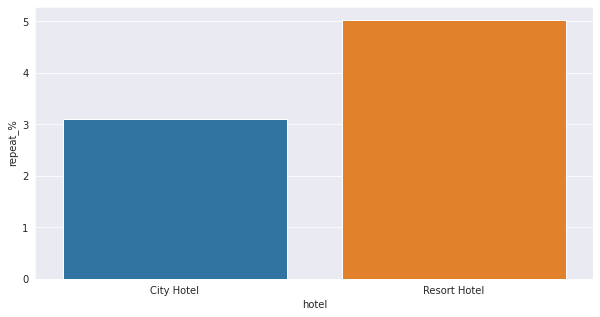

In [58]:
# Selecting and counting repeated customers bookings
repeated_data = df1[df1['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Both hotels have very small percentage that customer will repeat, but Resort hotel has slightly higher repeat % than City Hotel.



#***Conclusion***

***We learned that***

***Almost 35% of bookings were canceled.
More than 60% of the population booked the City hotel.
More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.
Most bookings were made from July to August. And the least bookings were made at the start and end of the year.
Portugal, the UK, and France, Spain and Germany are the top countries from most guests come, more than 80% come from these 5 countries.
Most people stay for one, two, or three.***

***-> For Resort hotel, the most popular stay duration is three, two, one, and four days respectively.***

***-> For City hotel, most popular stay duration is one, two, seven(week), and three respectively.***

***Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly
We then performed feature selection and feature engineering, and then made the predictive model using the Decision Tree to predict whether our customer/guest will cancel the booking or not. And we achieved 99% accuracy.***

---

